In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import accuracy_score

import joblib

## Reading Dataset

In [2]:
ad = pd.read_csv("advertising.csv")

## Analyzing and visualizing the data

In [3]:
ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# Droping the features that we don't need

In [7]:
ad.drop(["Ad Topic Line",'City','Country','Timestamp'], axis=1, inplace=True)

In [8]:
ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0


In [9]:
#Visualizeing the data to get some insights of the features

In [10]:
sns.set_style('darkgrid')

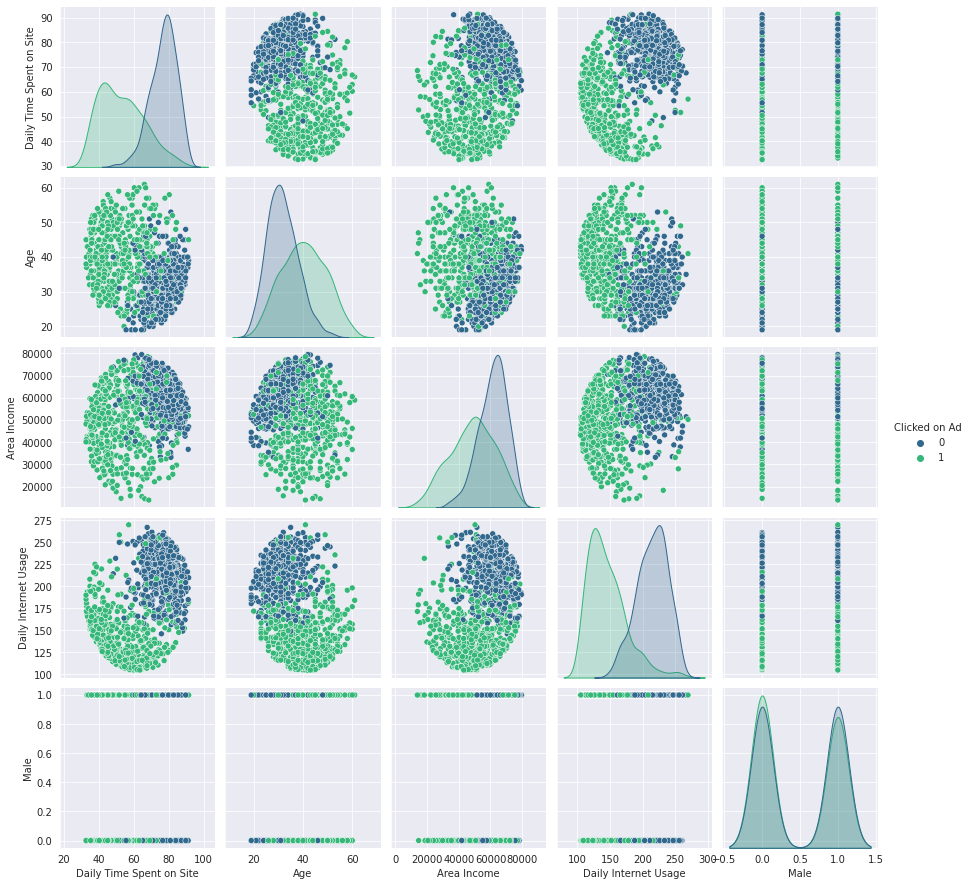

In [11]:
sns.pairplot(data=ad, hue='Clicked on Ad', palette ='viridis')
plt.show()

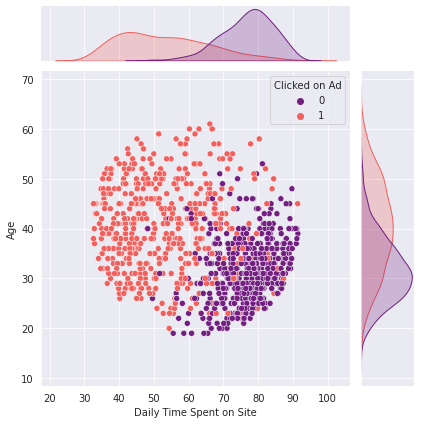

In [12]:
sns.jointplot(data=ad, x='Daily Time Spent on Site', y= 'Age', hue='Clicked on Ad', palette= 'magma')
plt.show()

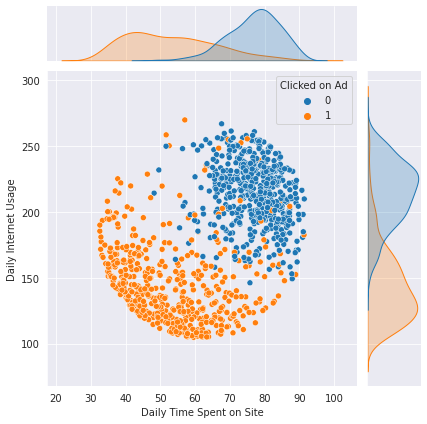

In [13]:
sns.jointplot(data=ad, x='Daily Time Spent on Site', y= 'Daily Internet Usage', hue='Clicked on Ad')
plt.show()

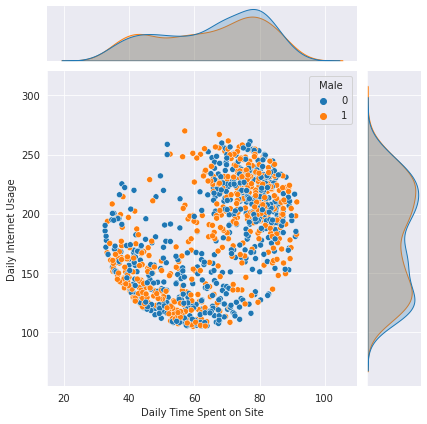

In [14]:
sns.jointplot(data=ad, x='Daily Time Spent on Site', y= 'Daily Internet Usage', hue='Male')
plt.show()

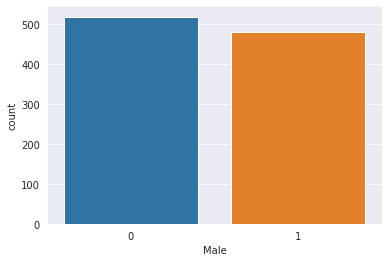

In [15]:
sns.countplot(data = ad, x='Male')
plt.show()

## Feature Scaling 

In [16]:
scaled=StandardScaler()

In [17]:
scaled.fit(ad.drop('Clicked on Ad', axis=1))

StandardScaler()

In [18]:
scaled_feat=scaled.transform(ad.drop('Clicked on Ad', axis=1))

In [19]:
df = pd.DataFrame(scaled_feat, columns=ad.columns[:-1])

In [20]:
df["Clicked"]=ad['Clicked on Ad']

In [21]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,0
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,0
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,0
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,0
...,...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,1.038750,1
996,-0.864601,1.023896,0.953329,-1.038735,1.038750,1
997,-0.843775,1.707176,-0.938570,-1.358924,1.038750,1
998,-0.596389,-1.936986,-0.975484,0.181172,-0.962695,0


## Building Model

In [22]:
X= df.drop("Clicked",axis=1)

In [23]:
y = df["Clicked"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
predictions = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[154   3]
 [  9 134]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       157
           1       0.98      0.94      0.96       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Using elbow method to find best k value

In [29]:
error_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_ = knn.predict(X_test)
    error_rate.append(np.mean(pred_!=y_test))

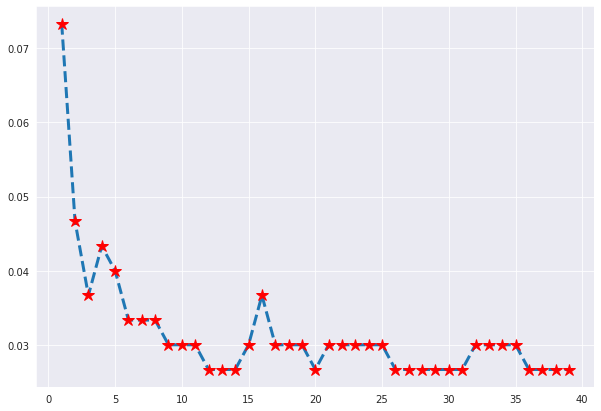

In [30]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40), error_rate, linestyle='dashed', linewidth=3, marker="*", markersize=12,
         markerfacecolor='red', mec='red')
plt.show()

## Let's choose k value to be 13

In [31]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [32]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[157   0]
 [  8 135]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       157
           1       1.00      0.94      0.97       143

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [33]:
print('Model Accuracy: ', accuracy_score(y_test, predictions))

Model Accuracy:  0.9733333333333334


## Model Serialization for Later Use

In [34]:
joblib.dump(knn, 'KNN Model')

['KNN Model']

In [35]:
Model = joblib.load("KNN Model")